# Análise da Emissão de Gases do Efeito Estufa em Brasília

- Alunos: Gabriel da Silva Loures e Kauã Ferdandes da Fonseca de Oliveira.

## Objetivo
Este notebook tem como objetivo analisar os dados de emissões de gases de efeito estufa (GEE) em Brasília(DF), com base no arquivo "gases.csv". A análise será dividida em quatro etapas principais:

1.  **Carregamento e Limpeza dos Dados:** Preparação do dataset para a análise.
2.  **Análise Exploratória de Dados (AED):** Extração de informações e respostas a perguntas específicas.
3.  **Visualização de Dados:** Criação de gráficos para ilustrar as descobertas.
4.  **Conclusões:** Resumo dos principais insights obtidos.

In [21]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Carregamento e Limpeza dos Dados

A primeira etapa é carregar os dados e prepará-los para a análise. Isso envolve corrigir o formato da tabela, verificar os tipos de dados e tratar valores ausentes.

In [22]:
# 1.1. Carregar o arquivo gases.csv em um DataFrame
try:
    df_raw = pd.read_csv('gases.csv')
    print("Arquivo 'gases.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'gases.csv' não encontrado. Verifique se o arquivo está na mesma pasta.")
    df_raw = pd.DataFrame() # Cria um DataFrame vazio para evitar erros posteriores

if not df_raw.empty:
    # 1.2. Transformação do formato da Tabela (de "larga" para "longa")
    # O formato original possui anos como colunas, o que não é ideal para análise.
    # Vamos "derreter" (melt) o DataFrame para ter uma coluna 'Ano' e uma coluna 'Emissao'.

    # Identifica as colunas que são de identificação e as que são de valores (anos)
    id_cols = list(df_raw.columns[:11])
    year_cols = list(df_raw.columns[11:])

    df = df_raw.melt(
        id_vars=id_cols,
        value_vars=year_cols,
        var_name='Ano',
        value_name='Emissao'
    )

    print("\nFormato da tabela transformado com sucesso.")

    # 1.3. Verificação e correção dos tipos de dados
    print("\nVerificando e corrigindo os tipos de dados...")
    df['Ano'] = pd.to_numeric(df['Ano']) # Converte a coluna 'Ano' para número
    df['Emissao'] = pd.to_numeric(df['Emissao'], errors='coerce') # Converte 'Emissao' para número

    # 1.4. Identificação e tratamento de valores ausentes (NaN)
    # Vamos assumir que valores ausentes (NaN) significam zero emissões para aquele registro.
    valores_ausentes_antes = df['Emissao'].isnull().sum()
    print(f"Valores ausentes encontrados na coluna 'Emissao': {valores_ausentes_antes}")

    df.fillna({'Emissao': 0}, inplace=True)
    print("Valores ausentes preenchidos com 0.")

    # Exibe as informações e as primeiras linhas do DataFrame limpo e pronto para análise
    print("\n--- Informações do DataFrame Tratado ---")
    df.info()

    print("\n--- 5 Primeiras Linhas do DataFrame Tratado ---")
    display(df.head())

Arquivo 'gases.csv' carregado com sucesso.

Formato da tabela transformado com sucesso.

Verificando e corrigindo os tipos de dados...
Valores ausentes encontrados na coluna 'Emissao': 8
Valores ausentes preenchidos com 0.

--- Informações do DataFrame Tratado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83268 entries, 0 to 83267
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Setor de emissão        83268 non-null  object 
 1   Categoria emissora      83268 non-null  object 
 2   Sub-categoria emissora  83268 non-null  object 
 3   Produto ou sistema      83268 non-null  object 
 4   Detalhamento            83268 non-null  object 
 5   Recorte                 77328 non-null  object 
 6   Atividade geral         83268 non-null  object 
 7   Bioma                   82782 non-null  object 
 8   Emissão/Remoção/Bunker  83268 non-null  object 
 9   Gás                     83268 non-null

,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Bioma,Emissão/Remoção/Bunker,Gás,Cidade,Ano,Emissao
0,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,2.937752
1,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Asinino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,0.630000
2,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Bubalino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,0.000000
3,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Caprino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,2.515000
4,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Equino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,55.854000


## 2. Análise Exploratória de Dados (AED)

Com os dados limpos e estruturados, podemos começar a extrair informações para responder às perguntas da atividade.

In [23]:
if 'df' in locals() and not df.empty:
    # 2.1. Qual o setor de emissão que mais emitiu gases em 2023?
    emissao_2023 = df[df['Ano'] == 2023]
    setor_maior_emissao_2023 = emissao_2023.groupby('Setor de emissão')['Emissao'].sum()
    setor_campeao = setor_maior_emissao_2023.idxmax()
    valor_maximo = setor_maior_emissao_2023.max()

    print(f"--- Pergunta 2.1 ---")
    print(f"O setor de emissão que mais emitiu GEE em 2023 foi: '{setor_campeao}'")
    print(f"Total emitido pelo setor: {valor_maximo:,.2f} toneladas\n")


    # 2.2. Qual a evolução das emissões do setor de "Agropecuária" ao longo do tempo?
    emissao_agro = df[df['Setor de emissão'] == 'Agropecuária']
    evolucao_agro = emissao_agro.groupby('Ano')['Emissao'].sum()

    print(f"--- Pergunta 2.2 ---")
    print("A evolução das emissões do setor de Agropecuária será detalhada no gráfico de linhas na próxima seção.")
    print("Abaixo, uma amostra dos dados (primeiros 5 e últimos 5 anos):")
    display(evolucao_agro.head())
    display(evolucao_agro.tail())


    # 2.3. Qual o gás mais emitido em Brasília (DF) no ano de 2023?
    gas_maior_emissao_2023 = emissao_2023.groupby('Gás')['Emissao'].sum()
    gas_campeao = gas_maior_emissao_2023.idxmax()
    valor_maximo_gas = gas_maior_emissao_2023.max()

    print(f"\n--- Pergunta 2.3 ---")
    print(f"O gás mais emitido em Brasília (DF) em 2023 foi: '{gas_campeao}'")
    print(f"Total emitido do gás: {valor_maximo_gas:,.2f} toneladas")

--- Pergunta 2.1 ---
O setor de emissão que mais emitiu GEE em 2023 foi: 'Energia'
Total emitido pelo setor: 3,921,772.05 toneladas

--- Pergunta 2.2 ---
A evolução das emissões do setor de Agropecuária será detalhada no gráfico de linhas na próxima seção.
Abaixo, uma amostra dos dados (primeiros 5 e últimos 5 anos):


Ano
1970    2387.783135
1971    2653.526656
1972    2918.433106
1973    3181.204454
1974    3453.348652
Name: Emissao, dtype: float64

Ano
2019    48347.152606
2020    60124.610512
2021    40542.942616
2022    25699.697330
2023    63588.176184
Name: Emissao, dtype: float64


--- Pergunta 2.3 ---
O gás mais emitido em Brasília (DF) em 2023 foi: 'CO2 (t)'
Total emitido do gás: 4,861,970.66 toneladas


## 3. Visualização de Dados

Gráficos são essenciais para comunicar as descobertas de forma clara e impactante. A seguir, criamos as visualizações solicitadas.

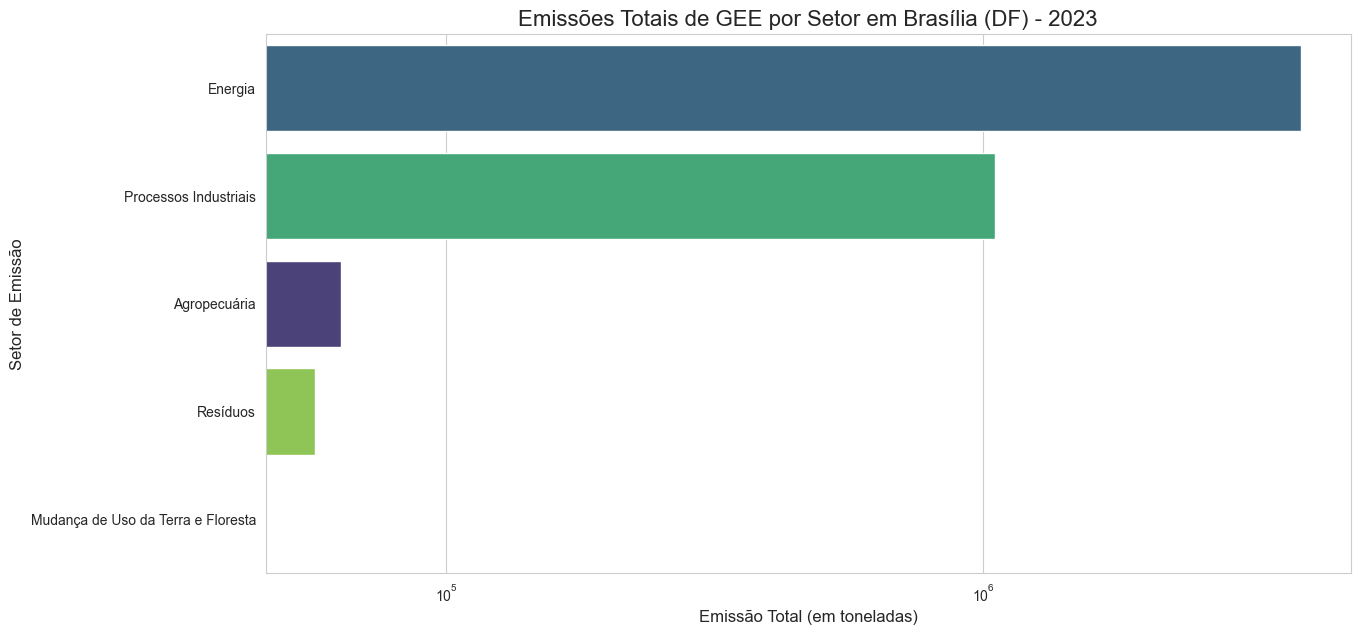

In [24]:
plt.figure(figsize=(14, 7))
sns.barplot(
    x=setor_maior_emissao_2023.values,
    y=setor_maior_emissao_2023.index,
    hue=setor_maior_emissao_2023.index,
    orient='h',
    order=setor_maior_emissao_2023.sort_values(ascending=False).index,
    palette='viridis',
    legend=False
)
plt.title('Emissões Totais de GEE por Setor em Brasília (DF) - 2023', fontsize=16)
plt.xlabel('Emissão Total (em toneladas)', fontsize=12)
plt.ylabel('Setor de Emissão', fontsize=12)
plt.xscale('log')
plt.show()

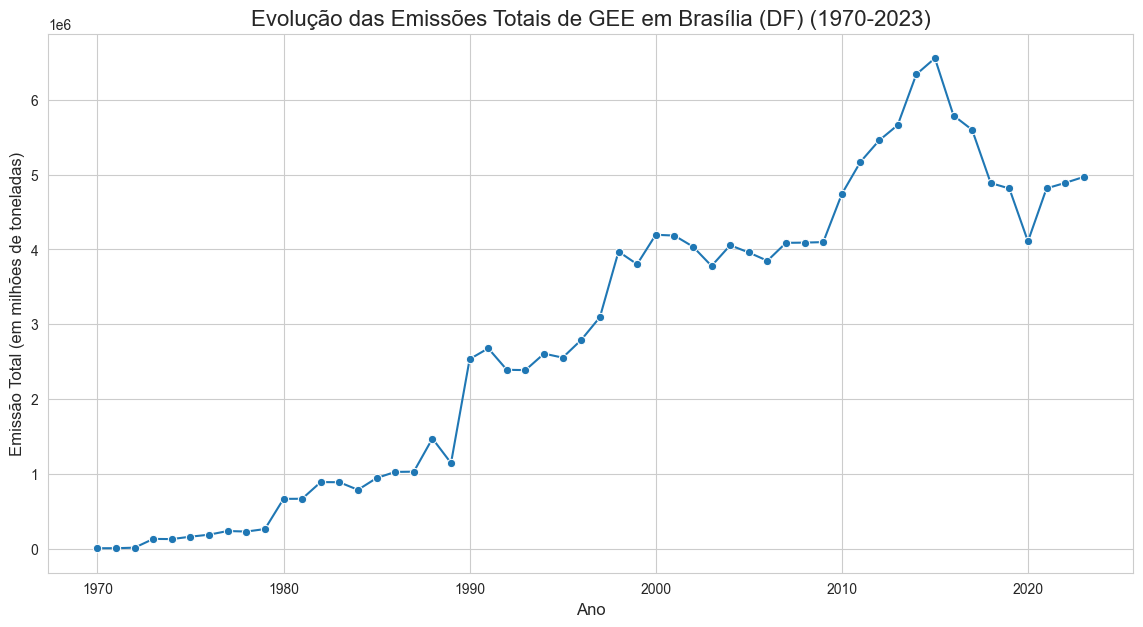

In [25]:
if 'df' in locals() and not df.empty:
    # 3.2. Gráfico de linha: evolução das emissões totais de Brasília (DF) ao longo dos anos
    emissao_total_por_ano = df.groupby('Ano')['Emissao'].sum()

    plt.figure(figsize=(14, 7))
    sns.lineplot(
        x=emissao_total_por_ano.index,
        y=emissao_total_por_ano.values,
        marker='o'
    )
    plt.title('Evolução das Emissões Totais de GEE em Brasília (DF) (1970-2023)', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Emissão Total (em milhões de toneladas)', fontsize=12)
    plt.show()

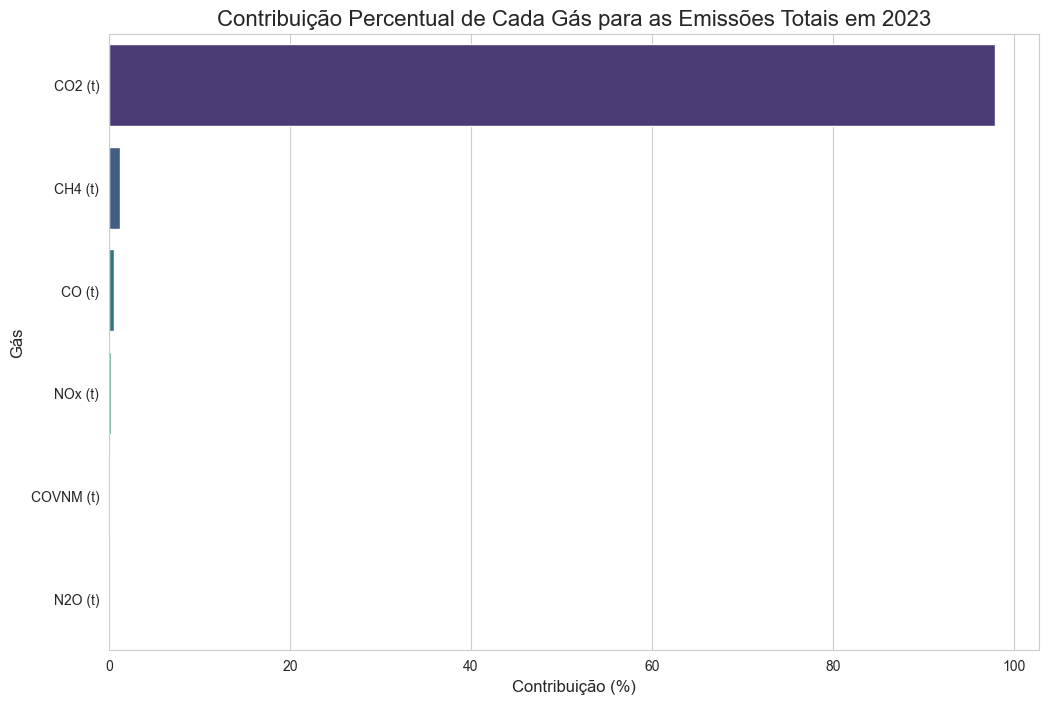

In [26]:
if 'df' in locals() and not df.empty:
    # Pega os dados dos gases emitidos em 2023
    gas_maior_emissao_2023 = df[df['Ano'] == 2023].groupby('Gás')['Emissao'].sum()
    dados_grafico = gas_maior_emissao_2023[gas_maior_emissao_2023 > 0].sort_values(ascending=False)

    # Calcula o percentual
    percentual_gases = (dados_grafico / dados_grafico.sum()) * 100

    # --- GERAÇÃO DO GRÁfico de barras CORRIGIDO ---
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=percentual_gases.values,
        y=percentual_gases.index,
        hue=percentual_gases.index,
        orient='h',
        palette='viridis',
        legend=False
    )
    plt.title('Contribuição Percentual de Cada Gás para as Emissões Totais em 2023', fontsize=16)
    plt.xlabel('Contribuição (%)', fontsize=12)
    plt.ylabel('Gás', fontsize=12)
    plt.show()

## 4. Conclusões

Com base na análise exploratória e nas visualizações, podemos extrair as seguintes conclusões sobre as emissões de gases de efeito estufa em Brasília (DF):

### Principais Descobertas

1.  **Setor de Energia é o Maior Emissor:** Em 2023, o setor de **Energia** foi, de longe, o maior responsável pelas emissões de GEE na cidade. O gráfico de barras mostra que sua contribuição é significativamente maior que a de todos os outros setores somados, o que sugere que políticas de mitigação devem focar principalmente no consumo e na fonte de energia da cidade.

2.  **Crescimento Contínuo das Emissões:** A análise da série histórica (1970-2023) revela uma tendência clara e preocupante de **aumento contínuo nas emissões totais** de GEE em Brasília. Houve um crescimento acentuado a partir dos anos 2000, indicando que o desenvolvimento da cidade veio acompanhado de um grande aumento na sua pegada de carbono.

3.  **Dióxido de Carbono (CO2) como Gás Predominante:** O **CO2 (t)** é o gás com a maior contribuição para as emissões totais em 2023, respondendo por uma vasta maioria do total, como ilustrado no segundo gráfico de barras. Isso está diretamente ligado ao fato de o setor de Energia ser o principal emissor, já que a queima de combustíveis fósseis libera primariamente CO2.